<a href="https://colab.research.google.com/github/mdaugherity/Numerical-2021/blob/main/Week_3_Linear_Algebra_Fits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LINEAR ALGEBRA LEAST-SQUARES FITS

A = augmented (nx2) matrix:  col[0]=$x_i$,  col[1]=1

c = (2x1) matrix, 2 parameters [a,b]   for y=ax+b

y = (nx1) matrix $y_i$


Use $  (A^TA)c=A^Ty $ and solve for c

Notes: 
* this CAN be extended to other polynomials
* this is textbook equation (3.21) on page 131


In [1]:
import numpy as np
import matplotlib.pyplot as plt

ACTUAL:	 -2 3
POLYFIT	 [-2.04764244  3.14908524]


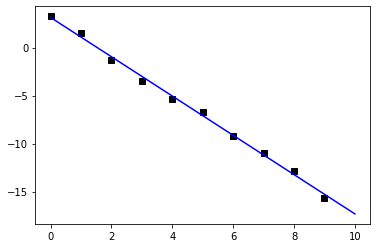

In [11]:
# RIGHT ANSWER
NUM = 10
xdata = np.arange(0,NUM)
m = -2
b = 3
ydata = -2*xdata + 3 + 0.5*np.random.randn(NUM)
print('ACTUAL:\t',m,b)
p = np.polyfit(xdata,ydata,deg=1)
print('POLYFIT\t',p)
xfit = np.linspace(0,NUM)
yfit = np.polyval(p,xfit)

plt.plot(xdata,ydata,'ks')
plt.plot(xfit,yfit,'b-')

plt.show()

## LINEAR ALGEBRA VERSION
Will give identical results to polyfit.

NOTE: the *reshape(m,n)* command will change a matrix to have dimensions m by n.  Either m or n can be replaced by a -1 which means "make this the appropriate size so my matrix has the right number of elements".  

* reshape(-1,1) creates an nx1 (column) matrix
* reshape(1,-1) creats an 1xn (row) matrix

In [13]:
# LINEAR ALGEBRA VERSION

# DEFINE MATRICES
A = np.ones((NUM,2))  # A: first column is xdata, second column is 1's 
A[:,0] = xdata  
print(A)

y = ydata.reshape(-1,1) # y: (nx1) column matrix of ydata
print(y)

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]
 [7. 1.]
 [8. 1.]
 [9. 1.]]
[[  3.27281016]
 [  1.47459868]
 [ -1.25087644]
 [ -3.43989633]
 [ -5.33479614]
 [ -6.72887772]
 [ -9.18114343]
 [-10.93087296]
 [-12.87015645]
 [-15.66384654]]


In [15]:
# Construct "normal" forms
ANORM = A.T @ A
#print(ANORM)
BNORM = A.T @ y
#print(BNORM)
c = np.linalg.solve(ANORM,BNORM) # c is our solution

print('ACTUAL:\t',m,b)
print('POLYFIT\t',p)
print('LIN ALG\t',c.T)

[[285.  45.]
 [ 45.  10.]]
[[-441.86925812]
 [ -60.65305716]]
ACTUAL:	 -2 3
POLYFIT	 [-2.04764244  3.14908524]
LIN ALG	 [[-2.04764244  3.14908524]]
